# CS295B F18: Homework 3
## Differentially Private Algorithms

## Instructions

This assignment has two parts: the first covers contingency tables, and the second covers clipping.

Before you start, download the example dataset and ensure that all cells in this notebook execute without error. If you have trouble getting the notebook to run, please post a question on Piazza.

To ensure that the notebook runs, I've defined a function `your_code_here()` that simply returns the number `1`. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to `your_code_here()` in place or insert dummy values so that the cell does not throw an error when it runs.

To help you arrive at the correct solution, I have left the value computed by my solution in the uploaded version of this notebook. You can refer to these example results by viewing the notebook on Github. If you re-run the cell after downloading the notebook, the results will disappear (because the notebook no longer contains the code that generated them). Your solutions should produce results similar to the ones in the uploaded notebook.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.

The point value of each question is listed with the question, and these add up to 100 points. The assignment is due by 11:59pm on Monday, October 1. When you have finished your assignment, submit it via Blackboard under the assignment "Homework 3." For questions on grading and submitting assignments, refer to the course webpage or email the instructor.

## Begin preamble ========================

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

In [1]:
# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

## End preamble =======================

# Part 1: Contingency Tables

The first part of this assignment asks you to construct and analyze contingency tables. We'll continue using the `adult` census dataset.

In [3]:
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Collaboration Statement

In the cell below, write your collaboration statement. This statement should describe all collaborations, even high-level ones (e.g. "I discussed my general approach for answering question 3 with Josh"). High-level collaborations of this kind are allowed as long as they are described; copying of answers or code is not allowed.

In [4]:
# Write your collaboration statement here

### Question 1 (5 points)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [5]:
your_code_here()

[('Never-married', 10683),
 ('Married-civ-spouse', 14976),
 ('Divorced', 4443),
 ('Married-spouse-absent', 418),
 ('Separated', 1025),
 ('Married-AF-spouse', 23),
 ('Widowed', 993)]

### Question 2 (5 points)

Write code to return a differentially private version of your result from Question 1. Use the definition of `laplace_mech` above.

In [6]:
your_code_here()

[10682.848133030631,
 14975.60827661935,
 4442.7245091621635,
 418.2616957502663,
 1023.7894863922751,
 23.57232758313454,
 994.1643751413036]

### Question 3 (5 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to Question 2, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

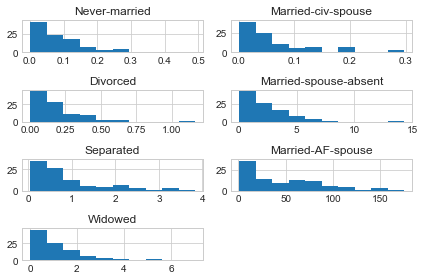

In [7]:
fig = plt.figure()

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_vals = [your_code_here()]
    errors = [your_code_here() for x in orig_vals]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 5 (5 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

### Question 6 (5 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [8]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 7 (5 points)

Write code to build a differentially private version of your result from Question 6.

*Hint*: use `applymap`.

In [9]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,2659.175352,1771.532110
Married-AF-spouse,7.969552,2.082040
Married-civ-spouse,1668.723064,13324.034589
Married-spouse-absent,195.161060,200.521187
Never-married,4744.826173,5923.385789
Separated,634.089266,402.282779
Widowed,821.479054,155.896472


### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to Question 7.

*Hint*: use `applymap` and `pct_error` on your answer to Question 7.

In [10]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,0.385063,0.061563
Married-AF-spouse,268.785429,138.392969
Married-civ-spouse,0.473652,0.016846
Married-spouse-absent,1.124842,3.909711
Never-married,0.391771,0.100711
Separated,3.786709,7.463570
Widowed,0.702595,5.519372


### Question 9 (5 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to Question 7?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table, as in Question 8.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [11]:
tabs = your_code_here()
display(tabs)
errors = your_code_here()
display(errors)

Education                     10th  11th  12th  1st-4th  5th-6th  7th-8th  \
Martial Status        Sex                                                   
Divorced              Female    67    79    17        5       10       33   
                      Male      53    51    22        5       10       40   
Married-AF-spouse     Female     0     0     0        0        0        0   
                      Male       0     0     0        0        0        0   
Married-civ-spouse    Female    33    35    20        6       18       23   
                      Male     316   319   110       75      154      336   
Married-spouse-absent Female     7     7     4        3        5        6   
                      Male       8    12     4        9       15        8   
Never-married         Female   128   248    84       12       29       34   
                      Male     233   338   148       27       60       79   
Separated             Female    31    28    12        5       11       13   
                      Male      18    20     2        4        7       10   
Widowed               Female    29    35     7       15       11       51   
                      Male      10     3     3        2        3       13   

Education                     9th  Assoc-acdm  Assoc-voc  Bachelors  \
Martial Status        Sex                                             
Divorced              Female   35         136        153        295   
                      Male     29          67         81        251   
Married-AF-spouse     Female    0           2          0          2   
                      Male      0           0          1          2   
Married-civ-spouse    Female   22          77         93        311   
                      Male    208         383        596       2457   
Married-spouse-absent Female    3           8          8         32   
                      Male      6           4          5         36   
Never-married         Female   50         161        178        869   
                      Male    105         176        184        926   
Separated             Female   17          16         29         46   
                      Male     16          14         13         46   
Widowed               Female   17          21         39         64   
                      Male      6           2          2         18   

Education                     Doctorate  HS-grad  Masters  Preschool  \
Martial Status        Sex                                              
Divorced              Female         20      937      153          0   
                      Male           13      676       80          1   
Married-AF-spouse     Female          0        8        0          0   
                      Male            0        5        0          0   
Married-civ-spouse    Female         20      533      113          3   
                      Male          266     4312      890         17   
Married-spouse-absent Female          3       63        9          0   
                      Male            4       58        8          4   
Never-married         Female         35     1235      216         10   
                      Male           38     1854      188         12   
Separated             Female          4      270       14          1   
                      Male            3      136       11          0   
Widowed               Female          4      344       31          2   
                      Male            3       70       10          1   

Education                     Prof-school  Some-college  
Martial Status        Sex                                
Divorced              Female           21           711  
                      Male             34           358  
Married-AF-spouse     Female            0             2  
                      Male              0             1  
Married-civ-spouse    Female           27           323  
                      Male            385          2495  
Married-spous

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


Education                           10th        11th        12th     1st-4th  \
Martial Status        Sex                                                      
Divorced              Female   13.212250    1.001492   14.392196  275.921447   
                      Male     18.766641    2.079362   40.706440  112.623169   
Married-AF-spouse     Female         inf         inf         inf         inf   
                      Male           inf         inf         inf         inf   
Married-civ-spouse    Female    5.105888   19.628118    9.276198  428.894535   
                      Male      1.622086    5.295529   21.831492   14.076637   
Married-spouse-absent Female   43.646362  580.897323  187.453473  143.218795   
                      Male     44.415604  251.251476  140.712503   37.658559   
Never-married         Female    3.269510   17.190364    7.124826    1.873453   
                      Male      2.358102    0.756349    4.891128   30.539178   
Separated             Female   11.012273   11.494234   99.501676  150.809126   
                      Male      3.140967   83.362882  559.138245  418.665421   
Widowed               Female   43.143319   44.731092   17.475232   12.325825   
                      Male    219.892637    2.818432  765.437869  939.010183   

Education                        5th-6th     7th-8th         9th  Assoc-acdm  \
Martial Status        Sex                                                      
Divorced              Female  158.696238   83.152448    9.519977   10.704262   
                      Male     32.454853    0.333750   14.173417   50.952313   
Married-AF-spouse     Female         inf         inf         inf   41.593735   
                      Male           inf         inf         inf         inf   
Married-civ-spouse    Female   23.156721   24.257070   15.456943   10.806136   
                      Male      0.944219    1.526570    7.794761    0.066418   
Married-spouse-absent Female   60.228727  195.677127  524.319194  110.528392   
                      Male     40.991643   97.631076  487.243235  138.441201   
Never-married         Female    4.677946   34.635716    1.920155    1.298829   
                      Male      1.745534    5.540590    1.608987    6.842197   
Separated             Female   12.344328   48.449786  148.928963   93.292525   
                      Male     79.363825  370.101591   29.172363  104.036918   
Widowed               Female   66.587501   13.069210   62.219640   25.623335   
                      Male     12.647432  237.687521  110.103167  382.343947   

Education                       Assoc-voc   Bachelors   Doctorate     HS-grad  \
Martial Status        Sex                                                       
Divorced              Female     9.859469    1.414352   46.872983    0.544858   
                      Male      18.713384   10.525381   13.887566    2.057109   
Married-AF-spouse     Female          inf  651.825947         inf  214.311877   
                      Male     134.699912  214.667924         inf   45.947736   
Married-civ-spouse    Female     0.531959    7.223208  120.475378    3.338190   
                      Male       3.965224    0.092581    5.486646    0.017470   
Married-spouse-absent Female    17.068730   21.589350   15.799091   32.226495   
                      Male      17.146672   14.533779  555.865629   22.689274   
Never-married         Female     4.230996    0.170761   14.592579    0.834173   
                      Male       0.850513    1.478157   39.929357    0.744797   
Separated             Female     5.553680   35.318247  324.360993    2.781989   
                      Male       0.543054   46.389483  414.220678    8.296518   
Widowed               Female     7.353236    2.618950  703.387420    0.726989   
                      Male    1231.612109  173.638338  520.826024   19.250483   

Education                        Masters    Preschool  Prof-school  \
Martial Status        Sex                                            
D

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in Question 10? Why?
- The contingency table in Question 10 contains 3 variables, compared to 2 in the table from Question 7. Is the privacy cost for the table in Question 10 different from the privacy cost in Question 7? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

### Question 12 (5 points)

Define a procedure `contingency_tables` that displays a set of 2-variable differentially private contingency tables. Your implementation should build and display a signle 2-variable contingency table for **each pair** of variables in the cartesian product of the `columns` argument with itself (excluding pairs of a variable with itself). Your implementation should have a **total privacy cost** equal to the value specified in the `epsilon` argument.

*Hint*: use `itertools.product` for cartesian product, and `display` to print out each contingency table.

In [12]:
import itertools
columns = ['Martial Status', 'Sex', 'Workclass', 'Country']

def contingency_tables(epsilon, columns):
    your_code_here()

contingency_tables(0.1, columns)

Sex,Female,Male
Martial Status,,
Divorced,2669.383181,1718.991467
Married-AF-spouse,7.783402,9.516493
Married-civ-spouse,1653.927856,13307.421908
Married-spouse-absent,203.035979,235.438004
Never-married,4760.768079,5916.668589
Separated,628.531548,404.271367
Widowed,829.803086,170.437879


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Martial Status,,,,,,,,
Divorced,157.713746,373.242292,-1.644842,3102.330481,124.464479,293.489711,211.192145,26.285509
Married-AF-spouse,-19.647037,2.148053,-1.676536,17.344712,2.081295,-3.363612,1.691988,11.197846
Married-civ-spouse,475.444341,1000.856445,3.693508,9727.066682,848.975629,1682.311485,595.974167,2.149082
Married-spouse-absent,-26.097138,62.263812,-3.134734,273.924829,-8.558585,26.558638,39.054522,4.837558
Never-married,251.260342,543.352281,6.218523,8180.888791,113.889546,455.189425,431.004954,-0.042854
Separated,33.238699,80.938001,-9.833563,775.162141,25.033345,55.701596,39.423144,1.341533
Widowed,64.120419,88.218652,4.873110,583.731301,36.039404,71.415839,94.592650,22.926967


Country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Martial Status,,,,,,,,,,,,,,,,,,,,,
Divorced,4.211484,19.712741,7.810773,23.785153,15.150558,25.911714,-3.055770,15.641174,5.007339,3.959140,...,5.808894,16.444256,7.274258,5.317208,8.868380,-7.585282,-0.121758,4119.999562,2.893459,1.752944
Married-AF-spouse,-11.598267,0.135202,3.820677,28.447595,-11.784044,-1.586254,1.306272,13.342596,6.715143,-5.287606,...,-2.979856,10.244588,4.414847,-2.135019,1.111890,-10.696166,15.265127,20.744372,24.840368,-1.871988
Married-civ-spouse,10.412263,58.869712,38.624784,0.151051,48.241504,-1.549725,5.152203,31.944228,22.643780,-0.309572,...,35.165689,47.256269,4.835736,37.100633,34.991248,6.739219,24.141226,13371.314737,20.399335,14.767129
Married-spouse-absent,-35.397815,3.433450,0.270259,15.259345,29.430644,9.450864,9.514314,-0.084417,5.809561,1.358156,...,12.012783,-5.280199,-7.015214,20.443776,-12.986435,12.552141,8.049776,251.187285,3.031393,-19.505352
Never-married,3.198803,45.670199,20.591884,45.517101,13.576206,31.619757,10.322852,32.725174,32.698985,9.790167,...,7.248781,26.608111,-8.660679,40.395093,26.536787,2.006619,-2.191226,9603.988464,32.306959,-0.724031
Separated,7.441951,16.876749,15.069136,-3.748897,9.770884,6.322144,-5.170186,5.975791,11.944687,15.206847,...,-1.399867,0.509979,7.161495,9.550932,-4.319825,-2.369601,2.677054,866.890401,7.281292,-3.642248
Widowed,9.462397,-7.282850,2.981551,2.346431,5.317285,6.197456,0.478186,-0.774454,47.496508,17.301006,...,-2.478484,22.262978,2.966266,3.256448,-5.750367,23.298315,11.632095,891.801366,1.558924,3.394903


Martial Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Sex,,,,,,,
Female,2691.217666,13.163024,1697.259393,203.203720,4740.754070,644.716913,830.428861
Male,1758.275469,14.434891,13358.256114,198.928653,5915.448256,355.206231,151.624164


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Sex,,,,,,,,
Female,315.106509,838.314440,-5.481588,7751.825759,117.056022,407.279102,479.825313,30.435632
Male,655.489537,1289.497216,1.629843,14945.353634,993.628460,2140.334206,802.963202,10.622704


Country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Sex,,,,,,,,,,,,,,,,,,,,,
Female,21.083013,16.332524,21.505576,23.342734,62.806629,39.148311,8.008329,30.997748,43.095182,29.011699,...,14.026638,48.916836,-7.694107,28.623132,12.046668,3.456310,12.004944,9698.305360,19.925303,7.001694
Male,15.578897,60.576296,60.885948,22.618004,31.273833,19.226064,14.864711,64.430308,64.583697,17.704762,...,10.267377,96.499683,5.913224,49.724266,20.799188,-5.009401,-1.957813,19467.650584,57.865267,25.245125


Martial Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Workclass,,,,,,,
Federal-gov,189.072224,-26.233320,468.006750,2.891592,254.593518,3.825341,44.995022
Local-gov,364.052560,-2.184846,1031.852311,17.712832,519.728213,48.759827,90.486326
Never-worked,0.388112,-10.414428,17.136315,17.494214,10.303769,2.282369,-2.810105
Private,3119.363324,20.045390,9745.627314,323.539647,8195.515546,755.540126,608.376950
Self-emp-inc,95.013984,-3.143149,881.340559,13.538581,137.825150,13.726871,42.688291
Self-emp-not-inc,307.863179,25.483760,1690.711322,25.370204,426.719570,53.977687,77.191280
State-gov,223.999628,3.779876,556.353463,23.495705,428.702897,35.762176,45.145337
Without-pay,14.283486,-5.161571,19.491172,9.693616,20.156084,20.657037,-0.364829


Sex,Female,Male
Workclass,,
Federal-gov,303.491777,661.057608
Local-gov,817.750706,1286.128410
Never-worked,-10.910332,-5.158056
Private,7753.839020,14950.700279
Self-emp-inc,132.365853,978.580654
Self-emp-not-inc,407.636670,2127.425431
State-gov,510.589005,804.855886
Without-pay,1.624837,-3.090352


Country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Workclass,,,,,,,,,,,,,,,,,,,,,
Federal-gov,8.003243,2.386732,-7.803348,5.085531,38.485865,3.272579,1.143726,0.232929,1.939442,-15.141070,...,26.983186,10.505605,12.135952,12.534678,-6.498733,5.433717,0.481861,882.162261,-6.444588,6.697140
Local-gov,23.014706,11.531328,27.657989,7.507021,-0.374890,3.641436,-9.120210,-0.566625,5.256905,2.945043,...,-25.742856,-3.109520,15.058385,-16.008978,44.821474,-13.240074,-1.162762,1955.724234,-19.717310,25.819305
Never-worked,-1.822418,-18.808337,-8.543166,7.501102,-8.357603,-9.263532,-25.503804,-13.097792,-26.000463,11.118142,...,-14.278562,4.652594,12.498231,3.145690,-40.051158,0.048240,-6.245999,4.734017,2.070697,-9.451878
Private,19.071740,94.124159,51.854952,40.076393,69.244176,88.577747,20.783723,75.164429,67.198547,13.731168,...,28.625260,72.610223,14.941841,50.425701,35.250025,11.048410,7.468650,20124.168112,87.084251,-3.523586
Self-emp-inc,-15.077421,9.040211,-26.191703,-5.048638,-3.759881,5.620088,3.188699,0.683154,-4.750500,-1.590679,...,-5.889912,6.576045,-4.616039,9.257630,2.118165,7.026233,3.140157,1013.467224,-25.618388,16.329501
Self-emp-not-inc,-9.963209,11.575600,27.289347,15.451242,12.605390,-0.897632,0.947666,9.472642,12.759990,-13.071303,...,3.611261,1.177814,5.767999,1.561580,-22.586412,3.370445,16.108014,2331.007568,22.865044,-1.072873
State-gov,1.140825,3.263001,8.546771,18.078338,-25.798480,18.062092,72.886463,3.956774,-9.179469,-5.568403,...,1.448115,-0.567795,4.250310,-4.575217,9.025246,-29.339890,-0.481796,1196.094606,-10.611973,-10.964378
Without-pay,-1.437906,-0.916304,-7.976890,-3.747425,-26.731090,1.674573,4.234074,15.879568,13.644440,8.113492,...,4.254913,-2.252374,-5.641895,26.602296,3.204680,2.582769,3.797590,-19.210178,-3.227366,-2.320465


Martial Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Country,,,,,,,
Cambodia,-6.628855,4.100608,7.727923,10.135977,6.099986,-6.203018,-9.612109
Canada,19.938200,-2.026535,35.872982,0.528526,45.608577,-23.402066,5.241094
China,11.062634,19.801294,70.225426,7.097221,-0.030511,-14.689436,3.278448
Columbia,5.970522,1.654160,35.920581,10.489128,26.539328,35.449834,9.079571
Cuba,58.949025,-6.816372,19.320578,-2.733637,-4.128726,10.773991,-1.159132
Dominican-Republic,13.131470,-1.622325,13.642400,18.060537,27.570414,31.068829,-5.510000
Ecuador,3.335915,-0.901192,13.914233,31.324136,13.696188,-6.522555,-6.656734
El-Salvador,-14.174447,7.252100,41.294656,-17.070853,43.888546,12.428033,16.175852
England,0.923424,3.860195,41.175122,-11.930700,42.316334,12.884181,-16.783173


Sex,Female,Male
Country,,
Cambodia,0.997002,26.852033
Canada,48.613468,86.095001
China,17.697288,97.420711
Columbia,19.732007,2.331819
Cuba,40.552702,51.149393
Dominican-Republic,36.325859,43.103510
Ecuador,3.690719,-6.659557
El-Salvador,41.060661,85.430080
England,35.922443,59.766422


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Country,,,,,,,,
Cambodia,-2.122142,-0.397923,0.663081,35.188211,-6.798455,34.665810,38.374620,-1.049585
Canada,-5.987198,15.993804,29.928540,76.496140,7.273100,17.092998,22.267947,18.057229
China,-8.769311,14.381337,-11.874262,49.718467,2.958035,-5.300270,14.452407,10.302235
Columbia,7.521066,5.058352,-11.427000,47.686941,-9.396389,0.678074,9.725579,9.012134
Cuba,0.298485,2.939168,48.711129,68.859668,13.575950,-2.827357,30.368538,-6.797252
Dominican-Republic,20.522377,-9.425109,-3.064460,67.195150,-15.840747,15.204116,-1.049729,-4.948675
Ecuador,6.950251,-15.321645,-24.919535,14.176965,-7.799815,9.868985,9.477273,-2.049026
El-Salvador,10.659863,-8.513793,2.632784,44.017603,-8.432721,10.563733,22.114334,27.412386
England,9.001486,-14.798668,1.771936,62.386916,8.729057,3.444186,47.707102,4.147362


### Question 13 (5 points)

In 4-5 sentences, answer the following:
- Briefly argue that your implementation has a privacy cost of exactly `epsilon`.
- What effect will increasing the number of columns in `columns` have on privacy? What effect will it have on accuracy? 

## Part 2: Clipping

### Question 14 (5 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

*Hint*: for each element of `xs`, `z_clip` should return the minimum of the element and `b`.

In [13]:
def z_clip(xs, b):
    return [your_code_here()]

### Question 15 (5 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

*Hint*: you can use `np.sum()` to sum up the values in a single column of a dataframe.

In [14]:
cg = adult_data['Capital Gain']

your_code_here()

('b', 'answer')
1 0.08328982525106723
10001 526.5809096772213
20001 672.8438930008292
30001 734.5153404379472
40001 784.5896624796536
50001 833.5014895119929
60001 882.3329136083045
70001 931.164337704616
80001 979.9957618009275
90001 1028.8271858972391
100001 1077.6488437087312
110001 1077.6488437087312
120001 1077.6488437087312
130001 1077.6488437087312
140001 1077.6488437087312
150001 1077.6488437087312
160001 1077.6488437087312
170001 1077.6488437087312
180001 1077.6488437087312
190001 1077.6488437087312
200001 1077.6488437087312
210001 1077.6488437087312
220001 1077.6488437087312
230001 1077.6488437087312
240001 1077.6488437087312
250001 1077.6488437087312
260001 1077.6488437087312
270001 1077.6488437087312
280001 1077.6488437087312
290001 1077.6488437087312


### Question 16 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and use `pct_error` to determine the error introduced for each value of `b`.

In [15]:
your_code_here()

('b', 'answer', 'pct_error')
1 0.08326811738227306 99.9922731678442
10001 526.3415154994915 51.15834637857674
20001 672.9656641845745 37.552416251980425
30001 734.0327423055024 31.885720790148405
40001 784.2049578475148 27.230009810183482
50001 833.6171242226496 22.644827293299528
60001 878.3341152566678 18.49533172291275
70001 933.6952951515987 13.358112839588454
80001 980.8392023935326 8.98341253557402
90001 1026.5299367465825 4.743558837424521
100001 1080.3952417722865 0.25485092658787867
110001 1078.392572476058 0.06901401803273735
120001 1074.5036004133585 0.2918616127817948
130001 1072.1555967476174 0.5097436881395179
140001 1083.123906462348 0.5080562917670285
150001 1091.1127108548235 1.2493742488282513
160001 1081.6149008908121 0.36802871410614013
170001 1069.883923403446 0.7205427213712925
180001 1088.9057303588315 1.0445783629628125
190001 1065.8903767697982 1.0911223083083543
200001 1074.9161783649658 0.25357660426385953
210001 1076.4074671083608 0.11519305269220705
220001 

### Question 17 (5 points)

In 5-10 sentences, answer the following:

- In Question 15, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 16, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

### Question 18 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [16]:
def auto_avg(xs, epsilon):
    return your_code_here()

auto_avg(cg, 1)

Avg is: 1078.67664087504 (selected clipping parameter 250001)


### Question 19 (5 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 16? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.